In [48]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import scipy.optimize as opt

In [11]:
churn_df=pd.read_csv('ChurnData.csv')

In [12]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
df.shape

(200, 28)

In [17]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
#take target as binary values if it is object
churn_df.churn = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [18]:
x=np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [21]:
y=np.asarray(churn_df[['churn']])
y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

# TRAIN DATA SET

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [25]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (120, 7) (120, 1)
Test set: (80, 7) (80, 1)


# MODEL SELECTION

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [34]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
#C uses for overfitting problem it should have lower where liblinear for optimizer


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
y_predict = LR.predict(x_test)
y_predict

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [47]:
y_predict_prob = LR.predict_proba(x_test)
y_predict_prob

array([[0.52282635, 0.47717365],
       [0.49058097, 0.50941903],
       [0.47177868, 0.52822132],
       [0.47897017, 0.52102983],
       [0.8680528 , 0.1319472 ],
       [0.53214196, 0.46785804],
       [0.35406331, 0.64593669],
       [0.69909521, 0.30090479],
       [0.44978844, 0.55021156],
       [0.79977212, 0.20022788],
       [0.69590067, 0.30409933],
       [0.76029985, 0.23970015],
       [0.79862889, 0.20137111],
       [0.44486078, 0.55513922],
       [0.77355299, 0.22644701],
       [0.49820371, 0.50179629],
       [0.44612883, 0.55387117],
       [0.94001833, 0.05998167],
       [0.54801908, 0.45198092],
       [0.46538901, 0.53461099],
       [0.66740403, 0.33259597],
       [0.55100955, 0.44899045],
       [0.66663055, 0.33336945],
       [0.95416276, 0.04583724],
       [0.96248048, 0.03751952],
       [0.81808683, 0.18191317],
       [0.70707847, 0.29292153],
       [0.44428771, 0.55571229],
       [0.9226019 , 0.0773981 ],
       [0.79452634, 0.20547366],
       [0.

# EVALUATION

JACCARD INDEX

In [45]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predict,pos_label=0)

0.7101449275362319

CONFUSION METRIX

In [69]:
#from sklearn.metrics import classification_report, confusion_metrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
print(confusion_matrix(y_test, y_predict, labels=[1,0]))

[[11  9]
 [11 49]]


Confusion matrix, without normalization
[[11  9]
 [11 49]]


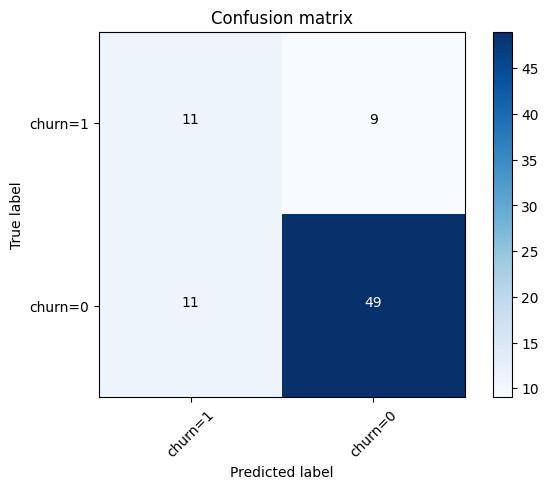

In [70]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [71]:
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        60
           1       0.50      0.55      0.52        20

    accuracy                           0.75        80
   macro avg       0.67      0.68      0.68        80
weighted avg       0.76      0.75      0.75        80



# Log Loss

In [72]:
from sklearn.metrics import log_loss
log_loss(y_test, y_predict_prob)

0.4409918148743774